In [455]:
"""
    CS231 assignment 1.
    K-Nearest Neighbour classifier.
"""
%pylab inline
import os
import time
import tensorflow as tf

Populating the interactive namespace from numpy and matplotlib


In [456]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train) ,(X_test, y_test) = cifar10.load_data()

In [457]:
# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000, 1)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000, 1)


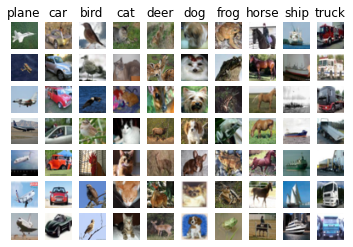

In [458]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [647]:
# Subsample the data for more efficient code execution in this exercise
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)


X_train[1], X_test[1]
from scipy.spatial import distance
a = (1, 2, 3)
b = (4, 5, 6)
dst = distance.euclidean(X_train, X_test)
dst

(5000, 3072) (500, 3072)


ValueError: Input vector should be 1-D.

In [642]:
class KNN:
    def __init__(self):
        pass
    
    def train(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def calculate_dists_l2(self, X):
        """ 
        Calculate the l2 distances between X and X_train
        and store the distance between ith X and jth X_train at 
        dists[i][j].
        """
        x = X
        y = self.X_train
        x2 = np.sum(X**2, axis=1, keepdims=True) 
        y2 = np.sum(self.X_train**2, axis=1)
        return np.sqrt(x2 + y2 - 2*x.dot(y.T))
        
    def predict(self, X, k=1):
        dists = self.calculate_dists_l2(X)
        return self.predict_labels(dists, k=k)
    
    def predict_labels(self, dists, k=1):
        """
        Given a matrix of distances between test points and training points,
        predict a label for each test point.

        Inputs:
        - dists: A numpy array of shape (num_test, num_train) where dists[i, j]
          gives the distance betwen the ith test point and the jth training point.

        Returns:
        - y: A numpy array of shape (num_test,) containing predicted labels for the
          test data, where y[i] is the predicted label for the test point X[i].
        """
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)
        for i in range(num_test):
            ix = np.argsort(dists[i, :])[:k]
            closest_y = [a[0] for a in self.y_train[ix]]
          #########################################################################
          # TODO:                                                                 #
          # Now that you have found the labels of the k nearest neighbors, you    #
          # need to find the most common label in the list closest_y of labels.   #
          # Store this label in y_pred[i]. Break ties by choosing the smaller     #
          # label.                                                                #
          #########################################################################
            y_pred[i] = np.argmax(np.bincount(closest_y))
              
      
            
            
        return y_pred
            
    
            
            
            

In [643]:
knn = KNN()
knn.train(X_train, y_train)

In [645]:
knn.predict(X_test, k=5)

array([0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 2., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 2., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.,
       0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 2.,
       0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0.,
       0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       2., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 2., 0.,
       0., 0., 0., 2., 2.

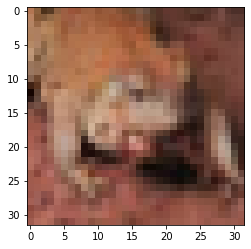

In [573]:
plt.imshow(X_test[5].reshape(32, 32, 3))